In [32]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

probabilities = [0.1, 0.2, 0.3, 0.4] # four possible outcomes
cumulative_prob = np.cumsum(probabilities)
print(cumulative_prob)
sample = cumulative_prob.searchsorted(np.random.uniform(0, 1))
print(sample)

[0.1 0.3 0.6 1. ]
3


In [20]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
    105: 1.00000}

Expected passenger wait time: 1.0013124676460823 min


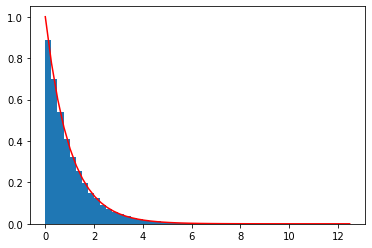

In [46]:
# Exponential interarrival scenario
# passenger arrives at uniformly distributed time
# buses arrive at exponentially distributed times

lmd = 1  
trials = 100000  

passenger_wait_times = []

for _ in range(trials):
    passenger_arrival_time = np.random.uniform(0, 10)
    bus_interarrival_times = np.random.exponential(lmd, size=100)
    bus_arrival_times = np.cumsum(bus_interarrival_times)
    index = bus_arrival_times.searchsorted(passenger_arrival_time)
    passenger_wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

print(f'Expected passenger wait time: {np.mean(passenger_wait_times)} min')

plt.hist(passenger_wait_times, bins=50, density=True)

x = np.linspace(0, max(passenger_wait_times))
plt.plot(x, sts.expon.pdf(x, scale=1/lmd), 'r-')

plt.show()

Expected passenger wait time: 0.6803454892362407


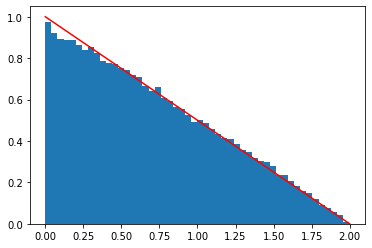

In [39]:
# Uniform interarrival scenario.
# passenger arriving at uniformly distributed times
# buses arrive at uniformly distributed times

lmd = 1  
trials = 100000  

passenger_wait_times = []

for _ in range(trials):
    passenger_arrival_time = np.random.uniform(0, 10)
    bus_interarrival_times = np.random.uniform(0, 2 * lmd, size=100)
    bus_arrival_times = np.cumsum(bus_interarrival_times)
    index = bus_arrival_times.searchsorted(passenger_arrival_time)
    passenger_wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

print(
    'Expected passenger wait time:',
    np.mean(passenger_wait_times))
plt.hist(passenger_wait_times, bins=50, density=True)

x = np.linspace(0, 2)
plt.plot(x, 1-x/2, 'r-')
plt.show()

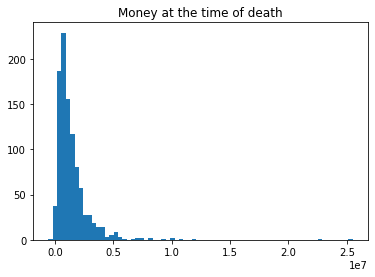

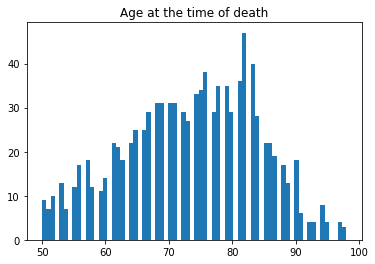

In [40]:
import numpy as np
import matplotlib.pyplot as plt

trials = 1000

initial_age = 50
initial_investment = 150000  
years_until_death = 105-initial_age
contribution_years = 20  
annual_contribution = 10000  
annual_withdrawal = 65000 
growth_rate_mean = 0.08
growth_rate_stdev = 0.09

prob_dying = data

money_at_death = []
age_at_death = []

for _ in range(trials):
    age = initial_age
    investment = initial_investment
    for years in range(years_until_death):
        if np.random.uniform(0, 1) < prob_dying[age]: #if Fannie died
            money_at_death.append(investment)
            age_at_death.append(age)
            break
        else:
            growth_rate = np.random.normal(growth_rate_mean, growth_rate_stdev)
            if age <= 70:
                # if younger than 70, keep contributing annually to the investment
                investment = investment * (1 + growth_rate) + annual_contribution
            else:
                # otherwise, withdraw annually
                investment = investment * (1 + growth_rate) - annual_withdrawal
            age += 1

plt.hist(money_at_death, bins=70)
plt.title('Money at the time of death')
plt.show()
plt.hist(age_at_death, bins=70)
plt.title('Age at the time of death')
plt.show()

In [43]:
print(f'Simulated probability of running out of money: {np.mean(np.array(money_at_death) <= 0)}')
print(f'Expected money remaining at death: {round(np.mean(money_at_death), 2)}')
print(f'Expected age at death: {round(np.mean(age_at_death), 2)}')
print(f'Computed median age at death: {round(np.median(age_at_death), 2)}')

Simulated probability of running out of money: 0.008
Expected money remaining at death: 1458949.12
Expected age at death: 73.46
Computed median age at death: 74.0
